In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df = pd.read_csv('SA_Aqar.csv')
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [42]:
df.dtypes

city            object
district        object
front           object
size             int64
property_age     int64
bedrooms         int64
bathrooms        int64
livingrooms      int64
kitchen          int64
garage           int64
driver_room      int64
maid_room        int64
furnished        int64
ac               int64
roof             int64
pool             int64
frontyard        int64
basement         int64
duplex           int64
stairs           int64
elevator         int64
fireplace        int64
price            int64
details         object
dtype: object

In [44]:
df["city"].unique()

array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [46]:
value_counts = df['price'].value_counts()
filtered_counts = value_counts[value_counts <= 10].sum()
filtered_counts

193

In [48]:
value_counts = df['price'].value_counts()
prices_to_keep = value_counts[value_counts > 10].index
df_filtered = df[df['price'].isin(prices_to_keep)]

In [50]:
df_New = df_filtered.copy()
df_New

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3713,الخبر,حي اللؤلؤ,غرب,437,0,7,5,2,1,1,...,1,0,1,0,1,1,0,1,60000,للإيجار فيلا دورين وملحق في حي الأصداف\n\nالمس...
3714,الخبر,حي الصواري,جنوب,400,0,5,5,3,0,1,...,1,0,1,0,1,1,0,0,55000,دبلكس للأيجار حي الصواري ج ٤٣\n\nمجلس خارجي (د...
3715,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...
3716,الخبر,حي الكورنيش,جنوب,300,13,6,5,2,1,1,...,0,0,1,0,1,1,0,0,90000,فيلا فاخرة في حي كورنيش الخبر. أفضل حي بالخبر....


In [52]:
#How many Nulls in the price 
missing_prices = df_New['price'].isnull().sum()
print(f"Number of missing values in 'price': {missing_prices}")

Number of missing values in 'price': 0


In [54]:
#Remove Rows with Missing Prices
df_New_clean = df_New.dropna(subset=['price'])
X = df_New_clean.drop(['details'], axis=1, errors='ignore')
y = df_New_clean['price']

In [56]:
df_New_clean['city'] = df_New_clean['city'].str.strip()
city_mapping = {'الرياض': 1, 'جدة': 2, 'الدمام': 3}
df_New_clean['city_numeric'] = df_New_clean['city'].map(city_mapping)
numeric_df_New = df_New_clean.select_dtypes(include=[float, int])
if 'city_numeric' not in numeric_df_New.columns:
    numeric_df_New = pd.concat([numeric_df_New, df_New['city_numeric']], axis=1)
corr = numeric_df_New.corr(method='pearson')
corr

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,city_numeric
size,1.000000,0.022284,-0.004404,-0.021286,-0.009402,-0.004626,0.025779,0.045669,-0.021785,-0.004318,...,-0.007891,0.031998,0.022312,0.011197,-0.005679,0.009867,-0.000682,0.014399,0.032823,-0.010805
property_age,0.022284,1.000000,0.008499,0.005259,0.038403,0.116292,-0.115978,0.237661,0.140730,-0.092792,...,-0.053847,-0.069049,0.049901,0.068166,-0.208546,0.070862,-0.061130,0.023833,0.229644,-0.182813
bedrooms,-0.004404,0.008499,1.000000,0.431550,0.110373,-0.126363,0.183137,-0.002772,0.140441,-0.026815,...,0.267375,-0.233629,0.227534,-0.029541,0.065805,0.106399,0.074464,0.323191,-0.103047,0.213480
bathrooms,-0.021286,0.005259,0.431550,1.000000,0.417646,-0.071410,0.207371,0.214360,0.274824,-0.181519,...,0.205245,-0.210248,0.263955,0.044847,0.144646,0.230336,0.114710,0.024276,0.070015,-0.005431
livingrooms,-0.009402,0.038403,0.110373,0.417646,1.000000,-0.027917,0.068250,0.302287,0.065896,-0.151917,...,0.137041,-0.032079,0.179607,0.124850,0.017082,-0.022381,0.174818,-0.091313,0.160367,0.088643
kitchen,-0.004626,0.116292,-0.126363,-0.071410,-0.027917,1.000000,0.001092,0.057511,0.052409,0.110496,...,-0.089570,0.120654,-0.100899,0.037823,-0.079267,-0.031620,0.060507,-0.046559,0.107983,0.139497
garage,0.025779,-0.115978,0.183137,0.207371,0.068250,0.001092,1.000000,0.200170,0.240649,0.087451,...,0.152173,0.015080,0.256552,0.057824,0.107843,0.038219,0.126096,0.107457,0.078417,-0.045765
driver_room,0.045669,0.237661,-0.002772,0.214360,0.302287,0.057511,0.200170,1.000000,0.306237,-0.057920,...,0.086879,-0.006458,0.159522,0.126380,-0.150322,0.111820,0.191010,-0.028414,0.415888,-0.068178
maid_room,-0.021785,0.140730,0.140441,0.274824,0.065896,0.052409,0.240649,0.306237,1.000000,0.043625,...,0.091319,-0.133095,0.116020,0.062021,-0.044891,0.264948,0.120850,-0.017484,0.291191,-0.008736
furnished,-0.004318,-0.092792,-0.026815,-0.181519,-0.151917,0.110496,0.087451,-0.057920,0.043625,1.000000,...,-0.020756,0.279377,0.052622,-0.000812,-0.110731,-0.086148,0.085449,0.020167,0.222805,0.143751


In [58]:
#Extract the numeric variables 
numeric_df_New = df_New.iloc[:,0:22]
numeric_df_New.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,0,0,1,0,1,1,0,0
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,0,0,1,0,0,1,0,0
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0,0,1,0,0,0,0,0
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,0,1,0,1,0,1,1,0,0


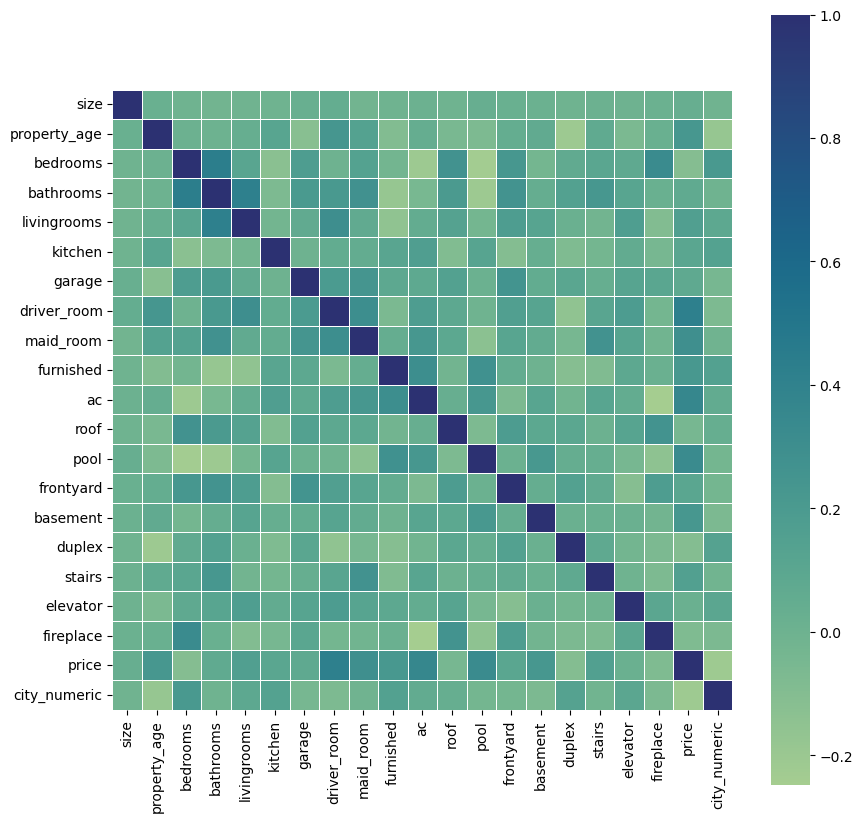

In [60]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, square = True, cmap= 'crest', linewidth = 0.5)
plt.show()

In [61]:
df_New['city'] = df_New['city'].str.strip()
# df_New['district'] = df_New['district'].str.strip()
#df_New['front'] = df_New['front'].str.strip()

# OneHotEncoding for both 'city'
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df_New[['city']])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['city']))

# Concatenate encoded columns with the rest of the DataFrame, and drop 'city' and 'front'
df_New = pd.concat([df_New.drop(['city'], axis=1), encoded_df], axis=1)

# Display the updated DataFrame
df_New.head()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,...,duplex,stairs,elevator,fireplace,price,details,city_الخبر,city_الدمام,city_الرياض,city_جدة
0,حي العارض,شمال,250.0,0.0,5.0,5.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,80000.0,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,0.0,0.0,1.0,0.0
1,حي القادسية,جنوب,370.0,0.0,4.0,5.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,60000.0,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...,0.0,0.0,1.0,0.0
2,حي القادسية,جنوب,380.0,0.0,4.0,5.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,60000.0,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...,0.0,0.0,1.0,0.0
3,حي المعيزلة,غرب,250.0,0.0,5.0,5.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,55000.0,فيلا للايجار جديده لن تستخدم ش...,0.0,0.0,1.0,0.0
4,حي العليا,غرب,400.0,11.0,7.0,5.0,2.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,70000.0,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...,0.0,0.0,1.0,0.0


Mean Squared Error: 569197163.734476
R^2 Score: 0.7187679517669834


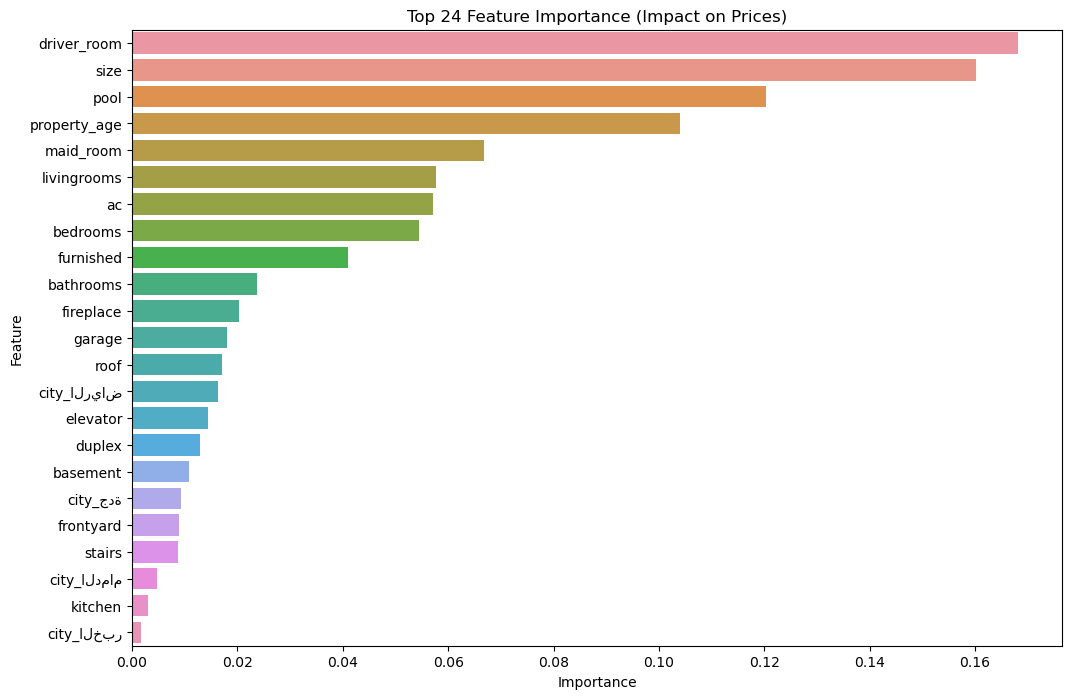

In [64]:
#Dropping any objects 
df_New_clean = df_New.drop(columns=['city', 'district', 'front', 'details'], axis=1, errors='ignore')
#Drop missing Values
df_New_clean = df_New_clean.dropna(subset=['price'])
# X  The feature set, which includes all columns except for the price
# Y The target variable (price), which we want to predict using the features in 
X = df_New_clean.drop(columns=['price'], axis=1)
y = df_New_clean['price']
# Imputation for missing values 
imputer = SimpleImputer(strategy='median')  # Use 'median' for numeric columns
X_imputed = imputer.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Get the feature names after excluding 'city', 'district', 'front', and 'details'
feature_names = list(X.columns)
# Calculate and plot feature importance
importances = model.feature_importances_
# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Limit the plot to top 20 important features (or adjust as needed)
top_n = 26
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 24 Feature Importance (Impact on Prices)')
plt.show()